In [95]:
import pandas as pd 
import numpy as np

In [96]:
df=pd.read_csv('Covid.csv')
df

,profession,member,father_profession,There have any corona patients in your family?,affected,How is your family or your financial condition now,How is the relationship with your family in this corona crisis?,In which part you spend your time most in the corona pandemic?,How is going on your study or job?,how is your mental condition in this pandemic
0,Student,6,Business,No,No,Low,Conflicting,Sleep all day long,Not good,Depressed
1,Student,5,Unofficial Job,No,No,Low,Well,Family,Good,Depressed
2,Student,4,Business,No,No,Moderate,Friendly,by doing productive something,Not good,Depressed
3,Student,4,Official Job,No,No,Good,Well,by doing productive something,Not good,Well
4,Student,4,Official Job,Yes,Lungs,Moderate,Friendly,Study,Good,Tensed
...,...,...,...,...,...,...,...,...,...,...
168,Student,4,Official Job,No,Lungs,Good,Normal,Social media,Shut down,Depressed
169,Student,5,Business,No,No,Good,Friendly,Family,Good,Tensed
170,Student,4,Official Job,Yes,Nose,Moderate,Normal,by doing productive something,Shut down,Depressed
171,Student,4,Official Job,No,No,Moderate,Conflicting,Starting new Business,Shut down,Panicked


In [97]:
df.isnull().sum()

profession                                                         0
member                                                             0
father_profession                                                  0
There have any corona patients in your family?                     0
affected                                                           0
How is your family or your financial condition now                 0
How is the relationship with your family in this corona crisis?    0
In which part you spend your time most in the corona pandemic?     0
How is going on your study or job?                                 0
how is your mental condition in this pandemic                      0
dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

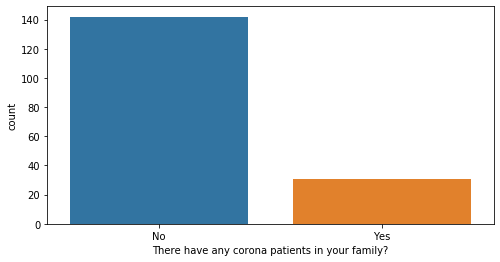

In [100]:
plt.subplots(figsize=(8,4))
sns.countplot(df['There have any corona patients in your family?'])

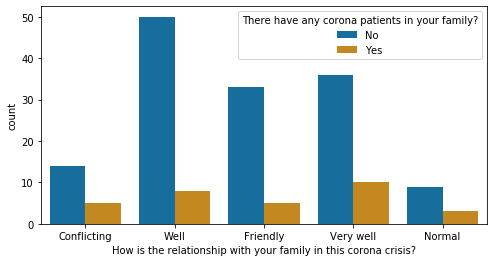

In [101]:
plt.subplots(figsize=(8,4))
sns.countplot(x='How is the relationship with your family in this corona crisis?', hue='There have any corona patients in your family?',data=df,palette = 'colorblind')

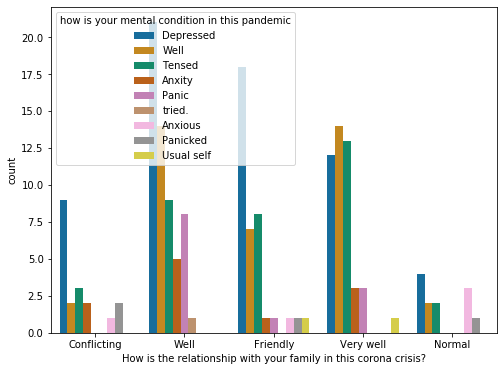

In [105]:
plt.subplots(figsize=(8,6))
sns.countplot(x='How is the relationship with your family in this corona crisis?', hue='how is your mental condition in this pandemic',data=df,palette = 'colorblind')

In [43]:
le = LabelEncoder()

In [44]:

df['profession'] = le.fit_transform(df['profession'])
df['father_profession']=le.fit_transform(df['father_profession'])
df['There have any corona patients in your family?']=le.fit_transform(df['There have any corona patients in your family?'])
df['affected'] = le.fit_transform(df['affected'])
df['How is your family or your financial condition now']=le.fit_transform(df["How is your family or your financial condition now"])
df['How is the relationship with your family in this corona crisis?'] = le.fit_transform(df['How is the relationship with your family in this corona crisis?'])
df['In which part you spend your time most in the corona pandemic?'] = le.fit_transform(df['In which part you spend your time most in the corona pandemic?'])
df['How is going on your study or job?'] = le.fit_transform(df['How is going on your study or job?'])
df['how is your mental condition in this pandemic'] = le.fit_transform(df['how is your mental condition in this pandemic'])

In [45]:
df

,profession,member,father_profession,There have any corona patients in your family?,affected,How is your family or your financial condition now,How is the relationship with your family in this corona crisis?,In which part you spend your time most in the corona pandemic?,How is going on your study or job?,how is your mental condition in this pandemic
0,4,6,2,0,1,2,0,6,2,2
1,4,5,16,0,1,2,4,1,1,2
2,4,4,2,0,1,3,1,11,2,2
3,4,4,7,0,1,1,4,11,2,7
4,4,4,7,1,0,3,1,10,1,5
...,...,...,...,...,...,...,...,...,...,...
168,4,4,7,0,0,1,2,7,3,2
169,4,5,2,0,1,1,1,1,1,5
170,4,4,7,1,2,3,2,11,3,2
171,4,4,7,0,1,3,0,8,3,4


In [47]:
array=df.values

In [48]:
x = array[:,0:8]
y = array[:,8]
df.columns = df.iloc[0]

In [49]:
model = LogisticRegression(solver='lbfgs')

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [51]:
x_train

array([[ 4,  3,  2, ...,  1,  1,  1],
       [ 4,  3,  4, ...,  3,  1,  7],
       [ 4,  5, 14, ...,  1,  4,  6],
       ...,
       [ 4,  3, 19, ...,  2,  1,  1],
       [ 4,  4,  2, ...,  3,  3,  1],
       [ 4,  4,  0, ...,  1,  3,  1]], dtype=int64)

In [52]:
y_train

array([2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2,
       3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 0,
       2, 2, 1, 2, 0, 0], dtype=int64)

In [53]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
pred=model.predict(x_test)
pred

array([2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2], dtype=int64)

In [55]:
model.score(x_test,y_test)

0.6285714285714286

In [56]:
from sklearn.metrics import  accuracy_score

In [57]:
accuracy_score(y_test,pred)

0.6285714285714286

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 0,  1,  1,  0],
       [ 0,  0,  7,  0],
       [ 0,  2, 22,  0],
       [ 0,  0,  2,  0]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.69      0.92      0.79        24
           3       0.00      0.00      0.00         2

    accuracy                           0.63        35
   macro avg       0.17      0.23      0.20        35
weighted avg       0.47      0.63      0.54        35



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#KNN

In [60]:
k = KNeighborsClassifier()
k.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
k.score(x_train,y_train)
knn_test_accuracy=k.score(x_test,y_test)
knn_test_accuracy

0.7714285714285715

Support Vector

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [63]:
S=SVC()

In [64]:
S.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
S.score(x_test,y_test)

0.6285714285714286

In [67]:
svm_test_accuracy=S.score(x_test,y_test)
svm_test_accuracy

0.6285714285714286

In [68]:
cross_val_score(S, x, y, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

array([0.57894737, 0.63157895, 0.66666667, 0.66666667, 0.64705882,
       0.64705882, 0.58823529, 0.58823529, 0.6875    , 0.73333333])

In [69]:
scv=svm_cross_val=cross_val_score(S, x, y, cv=10).mean()
print(scv)

0.6435281217750257


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

In [70]:
y_pred = S.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [71]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=(1,0)).ravel()

graph=classification_report(y_test,y_pred,labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           0       0.00      0.00      0.00         2

   micro avg       0.00      0.00      0.00         9
   macro avg       0.00      0.00      0.00         9
weighted avg       0.00      0.00      0.00         9



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
RFC=RandomForestClassifier()

In [74]:
RFC.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
RFC.score(x_test,y_test)

0.6857142857142857

In [76]:
RF_cross_val=cross_val_score(RFC, x, y, cv=10).mean()
RF_cross_val

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.565875902992776

In [77]:
y_pred = RFC.predict(x_test)
y_pred


array([2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2], dtype=int64)

In [78]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=(1,0)).ravel()
graph=classification_report(y_test,y_pred,labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.33      0.14      0.20         7
           0       0.67      1.00      0.80         2

   micro avg       0.50      0.33      0.40         9
   macro avg       0.50      0.57      0.50         9
weighted avg       0.41      0.33      0.33         9



#Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB

In [83]:
GNB=GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [84]:
GNB.score(x_test,y_test)

0.3142857142857143

In [85]:
from sklearn.naive_bayes import BernoulliNB

In [86]:
BNB=BernoulliNB()

In [87]:
BNB.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [88]:
BNB.score(x_test,y_test)

0.6571428571428571

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
MNB=MultinomialNB()

In [91]:
MNB.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
MNB.score(x_test,y_test)

0.6857142857142857

In [93]:
MNB_test_Accuracy=MNB.score(x_test,y_test)
MNB_test_Accuracy

0.6857142857142857